


### Advanced Machine Learning

# Unsupervised Learning - Clustering and Dimensionality Reduction

19/04/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)



# Clustering

<center>
<img src="./images/cluster_intro_1.png" style="width: 600px;">
</center>

<center>
<img src="./images/cluster_intro_2.png" style="width: 600px;">
</center>




<center>
<img src="./images/cluster_intro_3.png" style="width: 600px;">
</center>





# Clustering

- Partition data into groups (clusters)
- Points within a cluster should be “similar”.
- Points in different cluster should be “different”.


<center>
<img src="./images/cluster_intro_3.png" style="width: 600px;">
</center>




<center>
<img src="./images/cluster_intro_4.png" style="width: 600px;">
</center>





# Goals of Clustering

- Data Exploration
  - Are there coherent groups ?
  - How many groups are there ?

# Goals of Clustering - p2


- Data Partitioning
  - Divide data by group before further processing



# Goals of Clustering - p3

- Unsupervised feature extraction
  - Derive features from clusters or cluster distances


# Goals of Clustering - p4

- Evaluation and parameter tuning
  - Quantitative measures of limited use
  - Usually qualitative measures used
  - Best: downstream tasks
  - What is your goal?



# Clustering Algorithms




# K-Means



# Objective function for K-Means

$$\Large \min_{\mathbf{c}_j \in \mathbf{R}^p, j=1,..,k} \sum_i ||\mathbf{x}_i - \mathbf{c}_{x_i}||^2 $$
$\mathbf{c}_{x_i}$ is the cluster center $c_j$ closest to $x_i$


# K-Means algorithm (Lloyd's)

<table><tr><td><img src='./images/kmeans.png'></td><td><pre><code>- Pick number of clusters k.
- Pick k random points as
“cluster center”
- While cluster centers change:
  1. Assign each data point to it’s closest cluster center
  2. Recompute cluster centers as the mean of the assigned points.</code></pre>
</td></tr></table>


(5, 2)
(100,)


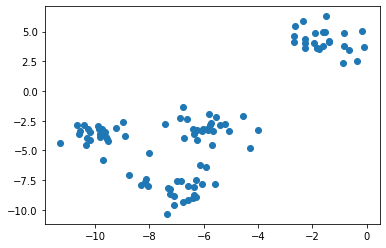

In [16]:
# K-Means API

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

X, y = make_blobs(centers=4, random_state=1,cluster_std=0.9)
km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
plt.scatter(X[:, 0], X[:, 1])

#print(km.cluster_centers_)
#print(km.labels_)

(100,)


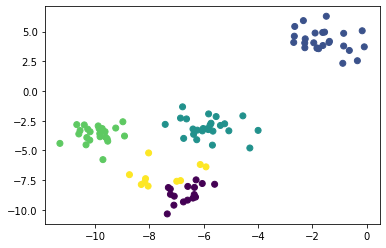

In [21]:
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
cent=km.cluster_centers_
#plt.scatter(cent[:, 0], cent[:, 1], c="red")



# Restriction of Cluster Shapes

<table><tr><td><img src='./images/cluster_shapes_1.png'></td><td> <br><br></td><td><img src='./images/cluster_shapes_2.png'>
</td></tr></table>


Clusters are Voronoi-diagrams of centers





# Limitations of K-Means - p1

<center>
<img src="./images/kmeans_limitations_1.png" style="width: 600px;">
</center>


- Cluster boundaries equidistant to centers




# Limitations of K-Means - p2

<center>
<img src="./images/kmeans_limitations_2.png" style="width: 600px;">
</center>


 - Can’t model covariances well



# Limitations of K-Means - p3

<center>
<img src="./images/kmeans_limitations_3.png" style="width: 600px;">
</center>

- Only simple cluster shapes





# Computational Properties

- Naive implementation (Lloyd's):
  - n_cluster * n_samples distance calculations per iteration

# Computational Properties - p2

- Fast "exact" algorithms:
  - Elkan's, Ying-Yang, ...
- Approximate algorithms:
  - minibatch K-Means

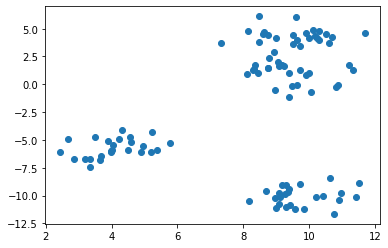

In [22]:
# local minimum
X, y = make_blobs(centers=4, random_state=4,cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1])


(3, 2)
(100,)


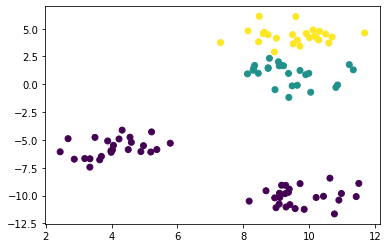

In [25]:
km = KMeans(n_clusters=3, random_state=0, n_init=1,init="random")
km.fit_predict(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
#cent=km.cluster_centers_
#plt.scatter(cent[:, 0], cent[:, 1], c="red")



# Initialization

- Random centers fast.
- K-means++ (default):
Greedily add “furthest way” point
- By default K-means in sklearn does 10 random
restarts with different initializations.
- K-means++ initialization may take much longer than clustering.


(3, 2)
(100,)


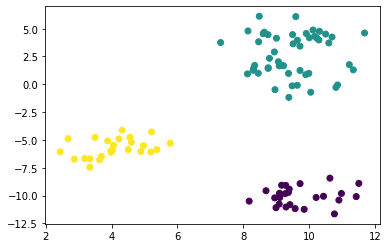

In [32]:
km = KMeans(n_clusters=3, random_state=0, n_init=1,init="random")

km.fit_predict(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)



# Feature Extraction using K-Means

- Cluster membership → categorical feature
- Cluster distanced → continuous feature
- Examples:
  - Partitioning low-dimensional space (similar to using basis functions)
  - Extracting features from high-dimensional spaces, for image patches, see
  http://ai.stanford.edu/~acoates/papers/coatesleeng_aistats_2011.pdf



# Agglomerative Clustering




# Agglomerative Clustering

- Start with all points in their own cluster.
- Greedily merge the two most similar clusters.

<center>
<img src="./images/agglomerative_clustering.png" style="width: 600px;">
</center>





# Dendograms


<table><tr><td><img src='./images/dendograms_1.png'></td><td> <br><br></td><td><img src='./images/dendograms_2.png'>
</td></tr></table>




# Linkage Criteria

<center>
<img src="./images/merging_criteria.png" style="width: 600px;">
</center>


<table><tr><td><pre>
single :   [96  1  1  1  1]
average :  [82  9  7  1  1]
complete : [50 24 14 11  1]
ward :     [31 30 20 10  9]
</pre></td><td> <br><br></td><td><pre><code>- Single Linkage
  - Smallest minimum distance
- Average Linkage
  - Smallest average distance between all pairs in the clusters
- Complete Linkage
  - Smallest maximum distance
- Ward (default in sklearn)
  - Smallest increase in within-cluster variance
  - Leads to more equally sized clusters.</code></pre>
</td></tr></table>




# Pros and Cons

- Can restrict to input “topology”  graph.
- Fast with sparse connectivity, otherwise O(log(n) n** 2 )
- Some linkage criteria an lead to very imbalanced cluster sizes
- Hierarchical clustering gives more holistic view than single clustering.





# DBSCAN




# Algorithm

<style>
code {
  font-family: Consolas,"courier new";
  color: black;
  background-color: #f1f1f1;
  padding: 2px;
  font-size: 175%;
}
</style>

<table><tr><td><img src="./images/DBSCAN-Illustration.svg" style="width: 600px;">
</td><td> <br><br></td><td><pre><code>- eps: neighborhood radius
- min_samples: 4
- A: Core
- B, C: not core
- N: noise</code></pre>
</td></tr></table>




## DBSCAN - Algorithm

1. Clusters are formed by “core samples”
2. Sample is “core sample” if more than min_samples is within epsilon - “dense region”
Start with a core sample
3. Recursively walk neighbors that are core-samples and add to cluster.
4. Add samples within epsilon that are not core samples (but don’t recurse)
5. If can’t reach any more points, pick another core sample, start new cluster.
6. If newly picked point has not enough neighbors, label outlier. Outliers can later be relabeled to belong to a cluster. 

<center>
<img src="./images/dbscan_animation.gif" style="width: 600px;">
</center>

by David Sheehan <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/">dashee87.github.io</a>



# Illustration of Parameters

<center>
<img src="./images/dbscan_illustration.png" style="width: 600px;">
</center>





# Pros and Cons

- Pro: Can learn arbitrary cluster shapes
- Pro: Can detect outliers
- Pro: Relative fast algorithm
- Con: Needs two (non-obvious?) parameters to adjust
- Improved version: HDBSCAN

<center>
<img src="./images/dbscan_pro_con.png" style="width: 600px;">
</center>



# (Gaussian) Mixture Models


Gaussian mixture models are very similar to KMeans, but
slightly more flexible.




# Mixture Models

- Generative model: find p(X).

 $$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k p_k(\mathbf{x} | \theta) $$ 




# Gaussian Mixture Models

$$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k) $$

$$ k \sim \text{Mult}(\pi), x \sim \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k)$$


# Gaussian Mixture Models

$$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k) $$

$$ k \sim \text{Mult}(\pi), x \sim \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k)$$

- Non-convex optimization.
- Initialized with K-means, random restarts.
- Optimization (EM algorithm):
    - Soft-assign points to components.
    - Compute mean and variance of components.
    - Iterate






$$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k) $$

<center>
<img src="./images/gmm1.png" style="width: 600px;">
</center>


<center>
<img src="./images/gmm2.png" style="width: 600px;">
</center>





# Why Mixture Models?
<br />
<br />

- Clustering (components are clusters)

- Parametric density model


([], <a list of 0 Text major ticklabel objects>)

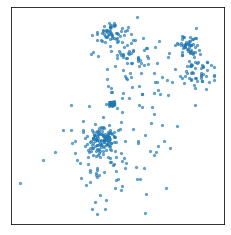

In [33]:
# Example
import numpy as np
rng = np.random.RandomState(3)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()
plt.xticks(())
plt.yticks(())

In [34]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
print(gmm.means_)
print("=======")
print(gmm.covariances_)

[[-2.28590079 -4.67421676]
 [ 8.68498099  5.20553679]
 [-0.37685321  6.94733869]]
[[[ 6.65149612  2.06612209]
  [ 2.06612209 13.75935857]]

 [[ 1.48127404 -1.0995123 ]
  [-1.0995123   4.19122603]]

 [[ 5.46730275 -3.34074938]
  [-3.34074938  4.66638995]]]


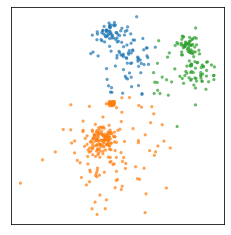

In [38]:
assignment = gmm.predict(X)
km = KMeans(n_clusters=3)
km.fit(X)
assignment = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

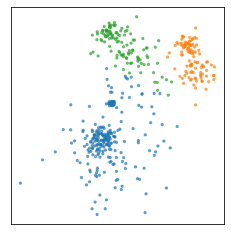

In [35]:
assignment = gmm.predict(X)
km = kmeans(n_components=3)
km.fit(X)
assignment = km.predict(X)


plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.show()

In [39]:
# Probability Estimates
 
gmm.predict_proba(X)

array([[9.99998492e-01, 8.76490962e-28, 1.50827215e-06],
       [1.20638165e-05, 9.99987336e-01, 6.00134638e-07],
       [1.00000000e+00, 5.89124387e-43, 1.35276927e-16],
       ...,
       [1.84051833e-04, 9.99516689e-01, 2.99258919e-04],
       [1.00000000e+00, 3.92304177e-46, 1.20648606e-17],
       [1.17962020e-03, 2.45269508e-20, 9.98820380e-01]])

In [40]:
# log probability under the model
print(gmm.score(X))
print(gmm.score_samples(X).shape)

-5.508383131660927
(500,)




# Probability Estimates

<table>
<tr><td><center>gmm.predict_proba(X)</center></td><td></td><td><center>gmm.score(X)</center></td></tr>
<tr><td><img src="./images/prob_est1.png" style="width: 600px;">
</td><td> <br><br></td><td><img src="./images/prob_est2.png" style="width: 600px;">
</td></tr></table>




# Covariance restrictions
<center>
<img src="./images/covariance_types.png" style="width: 600px;">
</center>



# GMM vs KMeans

<center>
<img src="./images/gmm_vs_kmeans_1.png" style="width: 600px;">
</center>


<center>
<img src="./images/gmm_vs_kmeans_2.png" style="width: 600px;">
</center>


# Clustering Evaluation Metrics

1.  Internal Validation Methods - e.g.:
   - inter-cluster distances (WSS), 
   - intra-cluster distances (BSS),
   - silhouette coefficient 
   - and more..
   
 some of these methods can be used for the number of clustering selection

# Clustering Evaluation Metrics

2. External Validation Methods - e.g.:
   - Homogenity score, 
   - completeness score, 
   - v-measure score, 
   - jaccard, 
   - normalized mutual information (NMI) 
   - and more...

all availablae in `sklearn.metrics`


# Clustering Summary

- KMeans<br/>Classic, simple. Only convex cluster shapes, determined by cluster centers.

- Agglomerative<br/>Can take input topology into account, can produce hierarchy.

- DBSCAN<br/>Arbitrary cluster shapes, can detect outliers, often very different sized clusters.

- Gaussian Mixture Models<br/>Can model covariance, soft clustering, can be hard to fit.




<center>
<img src="./images/bim_2.png" style="width: 600px;">
</center>

http://scikit-learn.org/dev/auto_examples/cluster/plot_cluster_comparison.html]


# Questions ?


    

# Unsupervised 2 - Dimensionality Reduction

## Principal Component Analysis
<center>
<img src="./images/pca-intuition.png" style="width: 600px;">
</center>


# PCA Computation
- Center X (subtract mean).
- In practice: Also scale to unit variance.
- Compute singular value decomposition:

<center>
<img src="./images/pca-computation.png" style="width: 600px;">
</center>


(569, 30)
(569, 2)


Text(0, 0.5, 'second principal component')

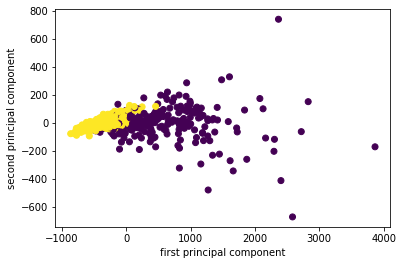

In [44]:
# PCA for Visualization
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

cancer=load_breast_cancer()
print(cancer.data.shape)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")


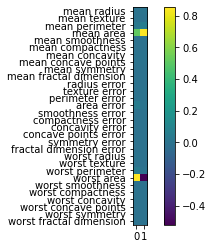

In [42]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()

# t-SNE

t-SNE is something that people found quite useful in
practice for inspecting datasets.

t-SNE stands for t-distribution stochastic neighbor
embedding, this is sort of the one that maybe has the least
strong theory behind it. But they're all kind of heuristics
and a little bit of hacky.

- Starts with a random embedding
- Iteratively updates points to make “close” points close.
- Global distances are less important, neighborhood counts.
- Good for getting coarse view of topology.
- Can be good for  nding interesting data point
- t distribution heavy-tailed so no overcrowding.
- (low perplexity: only close neighbors)

usage is similar to PCA (`from sklearn.manifold import TSNE`)

# t-SNE

$$p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$$

$$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$

$$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_{k \neq i} (1 + \lVert \mathbf{y}_i - \mathbf{y}_k\rVert^2)^{-1}}$$

$$KL(P||Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$


# PCA for feature extraction


<center>
<img src="./images/pca-for-feature-extraction.png" style="width: 600px;">
</center>




# Reconstruction

<center>
<img src="./images/reconstruction.png" style="width: 600px;">
</center>





# PCA for outlier detection
```python
pca = PCA(n_components=100).fit(X_train)
reconstruction_errors = np.sum((X_test - pca.inverse_transform(pca.transform(X_test))) ** 2, axis=1)
```

<table>
<tr><td><center>best-reconstructions</center></td><td></td><td><center>worst-reconstructions</center></td></tr>
<tr><td><img src="./images/best-reconstructions.png" style="width: 600px;">
</td><td> <br><br></td><td><img src="./images/worst-reconstructions.png" style="width: 600px;">
</td></tr></table>




# Questions?